## K-Nearest Neighbours from scratch in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def calculate_euclidean_distance(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))


def calculate_most_common_class(lst):
    return max(set(lst), key=lst.count)

In [4]:
dataset = pd.DataFrame(
    [
        [2.7810836, 2.550537003, 0],
        [1.465489372, 2.362125076, 0],
        [3.396561688, 4.400293529, 0],
        [1.38807019, 1.850220317, 0],
        [3.06407232, 3.005305973, 0],
        [7.627531214, 2.759262235, 1],
        [5.332441248, 2.088626775, 1],
        [6.922596716, 1.77106367, 1],
        [8.675418651, -0.242068655, 1],
        [7.673756466, 3.508563011, 1],
    ],
    columns=["X1", "X2", "y"],
)

dataset

,X1,X2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [27]:
distance = calculate_euclidean_distance(
    np.array(dataset[["X1", "X2"]].iloc[0:1, :]), np.array(dataset[["X1", "X2"]])
).tolist()
distance

[0.0,
 1.3290173915275787,
 1.9494646655653247,
 1.5591439385540549,
 0.5356280721938492,
 4.850940186986411,
 2.592833759950511,
 4.214227042632867,
 6.522409988228337,
 4.985585382449795]

In [33]:
class KneighboursClassifier:
    def __init__(self, k=5, dist_metric=calculate_euclidean_distance):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbours = []
        for x in X_test:
            distance = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distance, self.y_train))]
            neighbours.append(y_sorted[: self.k])

        return list(map(calculate_most_common_class, neighbours))

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [36]:
classifier = KneighboursClassifier(k=5)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9

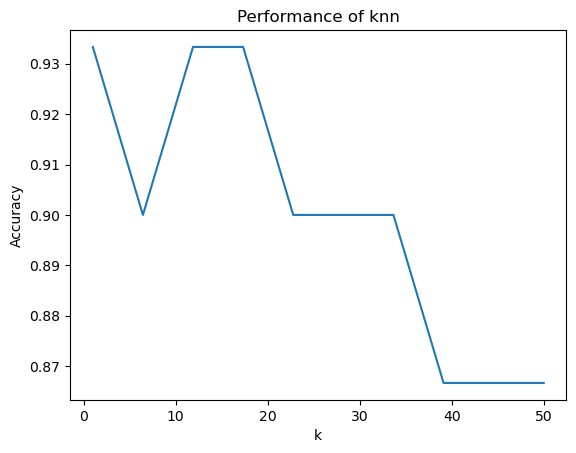

In [53]:
accuracies = []
k_list = np.linspace(1, 50, 10)

for k in k_list:
    k = int(k)
    classifier = KneighboursClassifier(k=k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(k_list, accuracies)
ax.set(xlabel="k", ylabel="Accuracy", title="Performance of knn")
plt.show()